In [102]:
# --- ライブラリのインポート ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm

In [77]:
# --- データ読み込み ---
df = pd.read_csv(r"C:\Users\sk062\Downloads\従業員データ_sjis.xlsx - 従業員データ_sjis.csv",encoding="utf-8")

In [78]:
# --- 列名変換（日本語 → 英語）---
column_translation = {
    '年齢': 'age', '性別': 'gender', '婚姻ステータス': 'marital_status',
    '部署': 'department', '職種': 'job_role', '給料': 'salary',
    '職位': 'job_level', '勤続年数': 'years_at_company',
    '勤務企業数': 'num_companies_worked', 'ストックオプション': 'stock_option_level',
    '昇給率': 'percent_salary_hike', '人事評価': 'performance_rating',
    '残業': 'overtime_hours', '出張頻度': 'business_travel',
    '家からの距離': 'distance_from_home', '教育レベル': 'education_level',
    '教育分野': 'education_field', '昨年の研修受講回数': 'training_times_last_year',
    '仕事への関与度': 'job_involvement', '仕事満足度': 'job_satisfaction',
    '職場環境満足度': 'environment_satisfaction', '人関関係満足度': 'relationship_satisfaction',
    'ワークライフバランス': 'work_life_balance', '離職': 'attrition',
    '入社日': 'hire_date', '退社日': 'termination_date'
}
df.rename(columns=column_translation, inplace=True)

In [79]:
category_translation = {
    '男性': 'Male', '女性': 'Female', '独身': 'Single', '既婚': 'Married',
    '離婚': 'Divorced', '営業': 'Sales', '研究開発': 'Research_Development',
    '人事': 'Human_Resources', 'ライフサイエンス': 'Life_Sciences',
    '医療': 'Medical', 'マーケティング': 'Marketing', '技術': 'Technical',
    '人文科学': 'Humanities', 'その他': 'Other'
}
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace(category_translation)

In [80]:
df.head()

,age,gender,marital_status,department,job_role,salary,job_level,years_at_company,num_companies_worked,stock_option_level,...,education_field,training_times_last_year,job_involvement,job_satisfaction,environment_satisfaction,relationship_satisfaction,work_life_balance,attrition,hire_date,termination_date
0,41,Female,Single,Sales,営業幹部,5993,2,8,8,0,...,Life_Sciences,0,3,4,2,1,1,True,2010/10/27,2017/3/20
1,49,Male,Married,Research_Development,リサーチサイエンティスト,5130,2,10,1,1,...,Life_Sciences,3,2,2,3,4,3,False,2007/11/20,NaN
2,37,Male,Single,Research_Development,ラボ技術者,2090,1,7,6,0,...,Other,3,2,3,4,2,3,True,2017/5/25,2017/8/20
3,33,Female,Married,Research_Development,リサーチサイエンティスト,2909,1,8,1,0,...,Life_Sciences,3,3,3,4,3,3,False,2009/2/20,NaN
4,27,Male,Married,Research_Development,ラボ技術者,3468,1,6,9,1,...,Medical,3,3,2,1,4,3,False,2015/7/27,NaN


In [81]:
print( df.shape )

(1470, 26)


In [82]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        1470 non-null   int64 
 1   gender                     1470 non-null   object
 2   marital_status             1470 non-null   object
 3   department                 1470 non-null   object
 4   job_role                   1470 non-null   object
 5   salary                     1470 non-null   int64 
 6   job_level                  1470 non-null   int64 
 7   years_at_company           1470 non-null   int64 
 8   num_companies_worked       1470 non-null   int64 
 9   stock_option_level         1470 non-null   int64 
 10  percent_salary_hike        1470 non-null   int64 
 11  performance_rating         1470 non-null   int64 
 12  overtime_hours             1470 non-null   bool  
 13  business_travel            1470 non-null   object
 14  distance

In [83]:
df.describe() 

,age,salary,job_level,years_at_company,num_companies_worked,stock_option_level,percent_salary_hike,performance_rating,distance_from_home,education_level,training_times_last_year,job_involvement,job_satisfaction,environment_satisfaction,relationship_satisfaction,work_life_balance
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,2.063946,11.279592,2.693197,0.793878,15.209524,3.153741,9.192517,2.912925,2.799320,2.729932,2.728571,2.721769,2.712245,2.761224
std,9.135373,4707.956783,1.106940,7.780782,2.498009,0.852077,3.659938,0.360824,8.106864,1.024165,1.289271,0.711561,1.102846,1.093082,1.081209,0.706476
min,18.000000,1009.000000,1.000000,0.000000,0.000000,0.000000,11.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,2911.000000,1.000000,6.000000,1.000000,0.000000,12.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,4919.000000,2.000000,10.000000,2.000000,1.000000,14.000000,3.000000,7.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,8379.000000,3.000000,15.000000,4.000000,1.000000,18.000000,3.000000,14.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,60.000000,19999.000000,5.000000,40.000000,9.000000,3.000000,25.000000,4.000000,29.000000,5.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [84]:
# --- describe() 結果取得 ---
desc = df.describe(include='all').round(2)

# --- サイズの動的計算 ---
num_rows, num_cols = desc.shape
cell_width = 1.2   # 列ごとの幅スケーリング（大きくすると広くなる）
cell_height = 0.7  # 行ごとの高さスケーリング
fig_width = max(6, num_cols * cell_width)
fig_height = max(3, num_rows * cell_height)

# --- 描画 ---
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.axis('off')  # 軸非表示

table = ax.table(
    cellText=desc.values,
    colLabels=desc.columns,
    rowLabels=desc.index,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # セルの縦のサイズ倍率

# --- 保存 ---
plt.tight_layout()
plt.savefig(r"C:\Users\sk062\Downloads\describe.png", dpi=300)
plt.close()

C:\Users\sk062\AppData\Local\Temp\ipykernel_20128\1096472891.py:29: UserWarning: Glyph 21942 (\N{CJK UNIFIED IDEOGRAPH-55B6}) missing from font(s) DejaVu Sans.
  plt.savefig(r"C:\Users\sk062\Downloads\describe.png", dpi=300)
C:\Users\sk062\AppData\Local\Temp\ipykernel_20128\1096472891.py:29: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  plt.savefig(r"C:\Users\sk062\Downloads\describe.png", dpi=300)
C:\Users\sk062\AppData\Local\Temp\ipykernel_20128\1096472891.py:29: UserWarning: Glyph 24185 (\N{CJK UNIFIED IDEOGRAPH-5E79}) missing from font(s) DejaVu Sans.
  plt.savefig(r"C:\Users\sk062\Downloads\describe.png", dpi=300)
C:\Users\sk062\AppData\Local\Temp\ipykernel_20128\1096472891.py:29: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  plt.savefig(r"C:\Users\sk062\Downloads\describe.png", dpi=300)
C:\Users\sk062\AppData\Local\Temp\ipykernel_20128\1096472891.py:29: UserWarning: Glyph 12383 (\N{HIR

In [85]:
df.columns

Index(['age', 'gender', 'marital_status', 'department', 'job_role', 'salary',
       'job_level', 'years_at_company', 'num_companies_worked',
       'stock_option_level', 'percent_salary_hike', 'performance_rating',
       'overtime_hours', 'business_travel', 'distance_from_home',
       'education_level', 'education_field', 'training_times_last_year',
       'job_involvement', 'job_satisfaction', 'environment_satisfaction',
       'relationship_satisfaction', 'work_life_balance', 'attrition',
       'hire_date', 'termination_date'],
      dtype='object')

In [86]:
# 数値型の列を抽出（量的変数）
numeric_cols = df.select_dtypes(include='number').columns

# describe() により統計量を取得し、Tで転置（見やすくする）
quantitative_summary = df[numeric_cols].describe().T

quantitative_summary

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
salary,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
job_level,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
years_at_company,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
num_companies_worked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
stock_option_level,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
percent_salary_hike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
performance_rating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
distance_from_home,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
education_level,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0


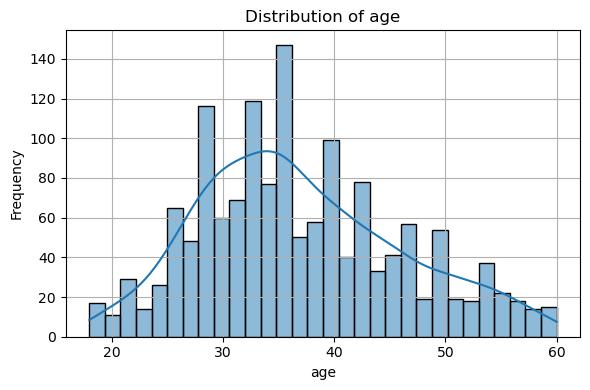

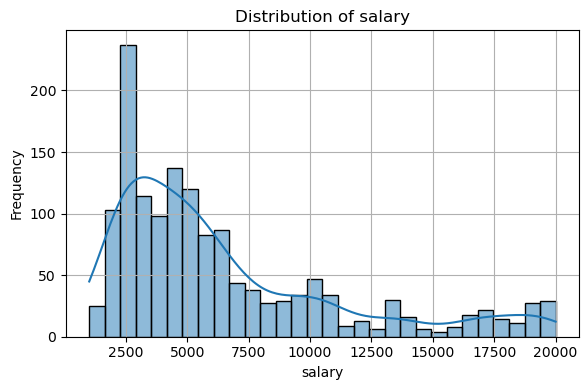

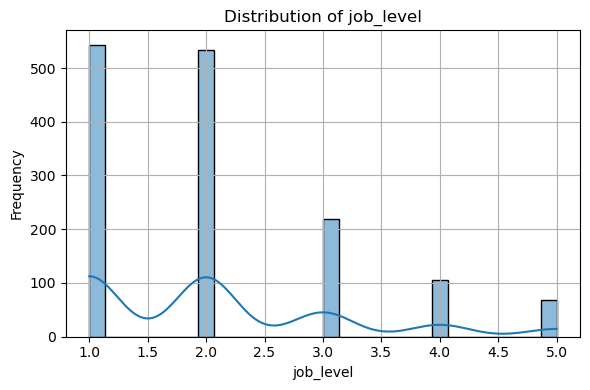

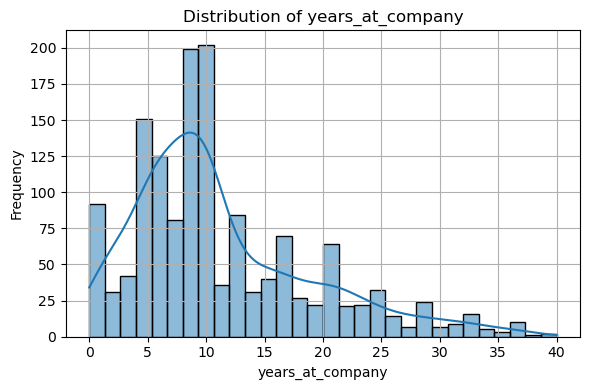

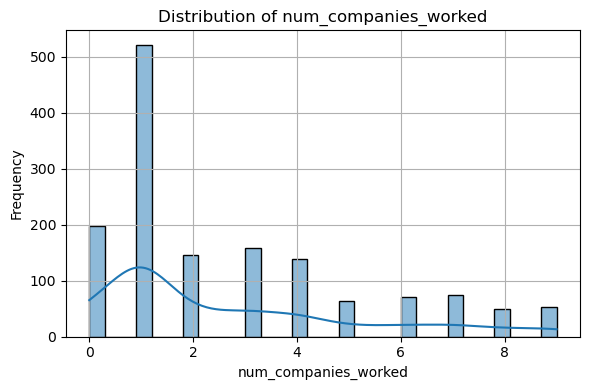

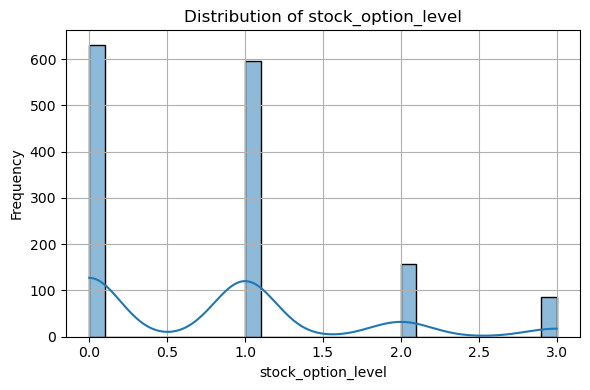

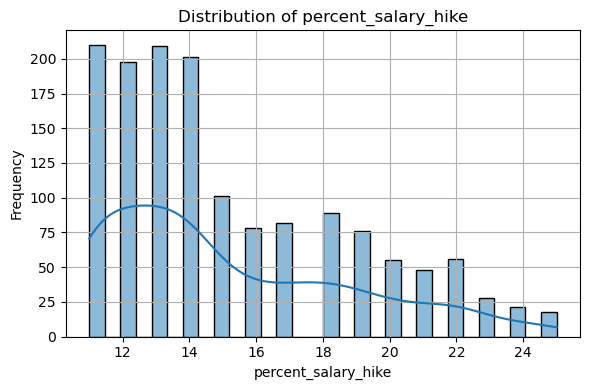

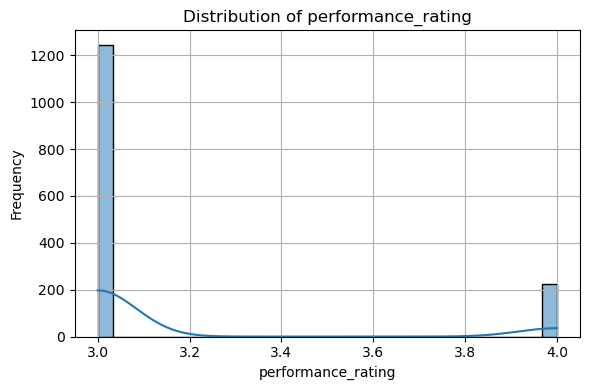

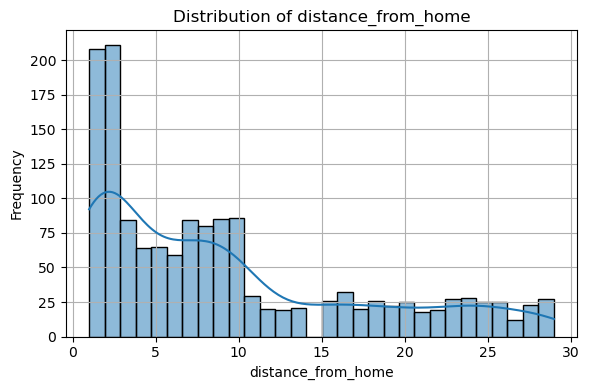

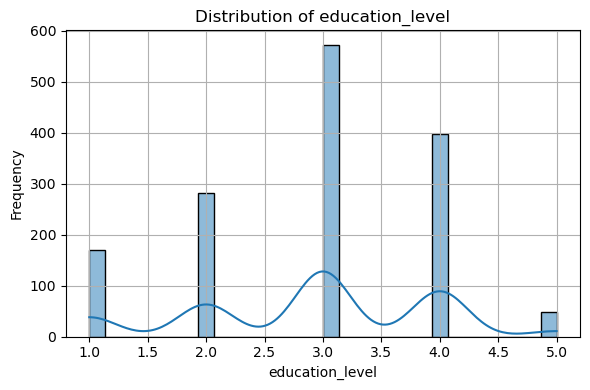

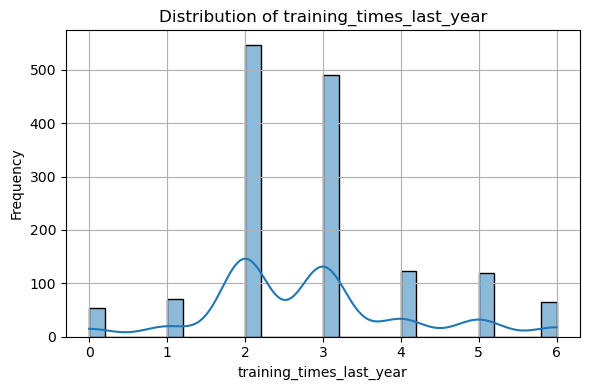

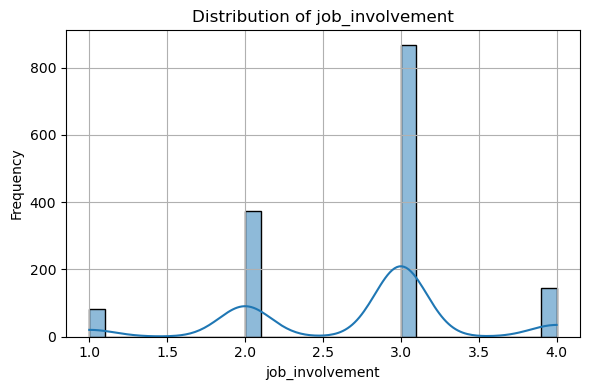

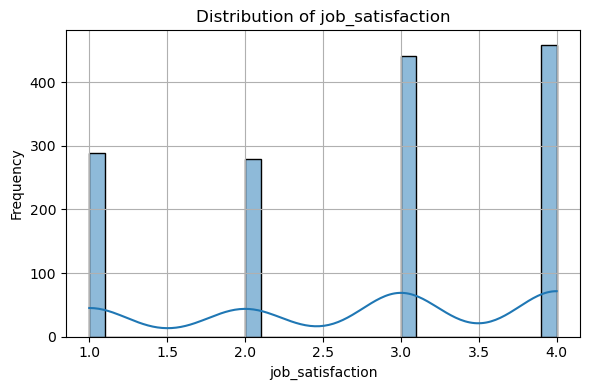

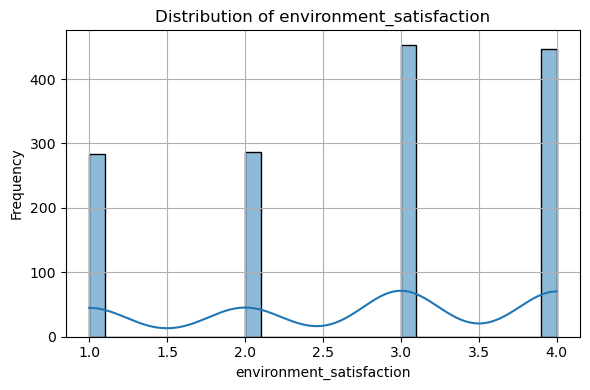

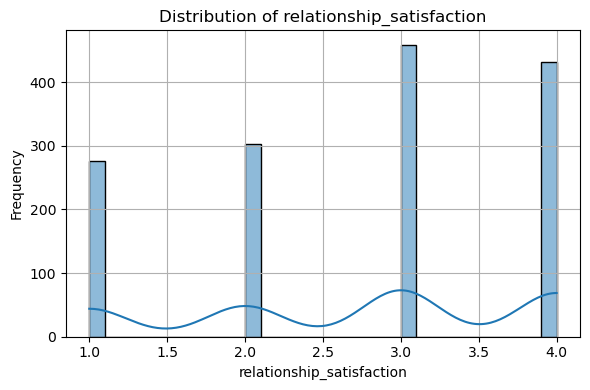

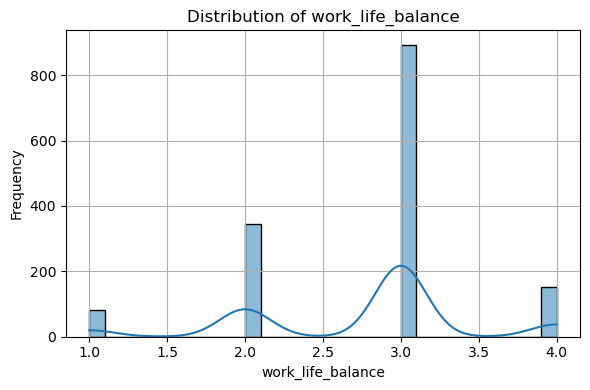

In [87]:
# --- ヒストグラム表示（数値列）---
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{col}_hist.png")
    plt.show()
    plt.close()

In [88]:
# 相関行列を計算（数値データのみ）
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

,age,salary,job_level,years_at_company,num_companies_worked,stock_option_level,percent_salary_hike,performance_rating,distance_from_home,education_level,training_times_last_year,job_involvement,job_satisfaction,environment_satisfaction,relationship_satisfaction,work_life_balance
age,1.000000,0.497855,0.509604,0.680381,0.299635,0.037510,0.003634,0.001904,-0.001686,0.208034,-0.019621,0.029820,-0.004892,0.010146,0.053535,-0.021490
salary,0.497855,1.000000,0.950300,0.772893,0.149515,0.005408,-0.027269,-0.017120,-0.017014,0.094961,-0.021736,-0.015271,-0.007157,-0.006259,0.025873,0.030683
job_level,0.509604,0.950300,1.000000,0.782208,0.142501,0.013984,-0.034730,-0.021222,0.005303,0.101589,-0.018191,-0.012630,-0.001944,0.001212,0.021642,0.037818
years_at_company,0.680381,0.772893,0.782208,1.000000,0.237639,0.010136,-0.020608,0.006744,0.004628,0.148280,-0.035662,-0.005533,-0.020185,-0.002693,0.024054,0.001008
num_companies_worked,0.299635,0.149515,0.142501,0.237639,1.000000,0.030075,-0.010238,-0.014095,-0.029251,0.126317,-0.066054,0.015012,-0.055699,0.012594,0.052733,-0.008366
stock_option_level,0.037510,0.005408,0.013984,0.010136,0.030075,1.000000,0.007528,0.003506,0.044872,0.018422,0.011274,0.021523,0.010690,0.003432,-0.045952,0.004129
percent_salary_hike,0.003634,-0.027269,-0.034730,-0.020608,-0.010238,0.007528,1.000000,0.773550,0.040235,-0.011111,-0.005221,-0.017205,0.020002,-0.031701,-0.040490,-0.003280
performance_rating,0.001904,-0.017120,-0.021222,0.006744,-0.014095,0.003506,0.773550,1.000000,0.027110,-0.024539,-0.015579,-0.029071,0.002297,-0.029548,-0.031351,0.002572
distance_from_home,-0.001686,-0.017014,0.005303,0.004628,-0.029251,0.044872,0.040235,0.027110,1.000000,0.021042,-0.036942,0.008783,-0.003669,-0.016075,0.006557,-0.026556
education_level,0.208034,0.094961,0.101589,0.148280,0.126317,0.018422,-0.011111,-0.024539,0.021042,1.000000,-0.025100,0.042438,-0.011296,-0.027128,-0.009118,0.009819


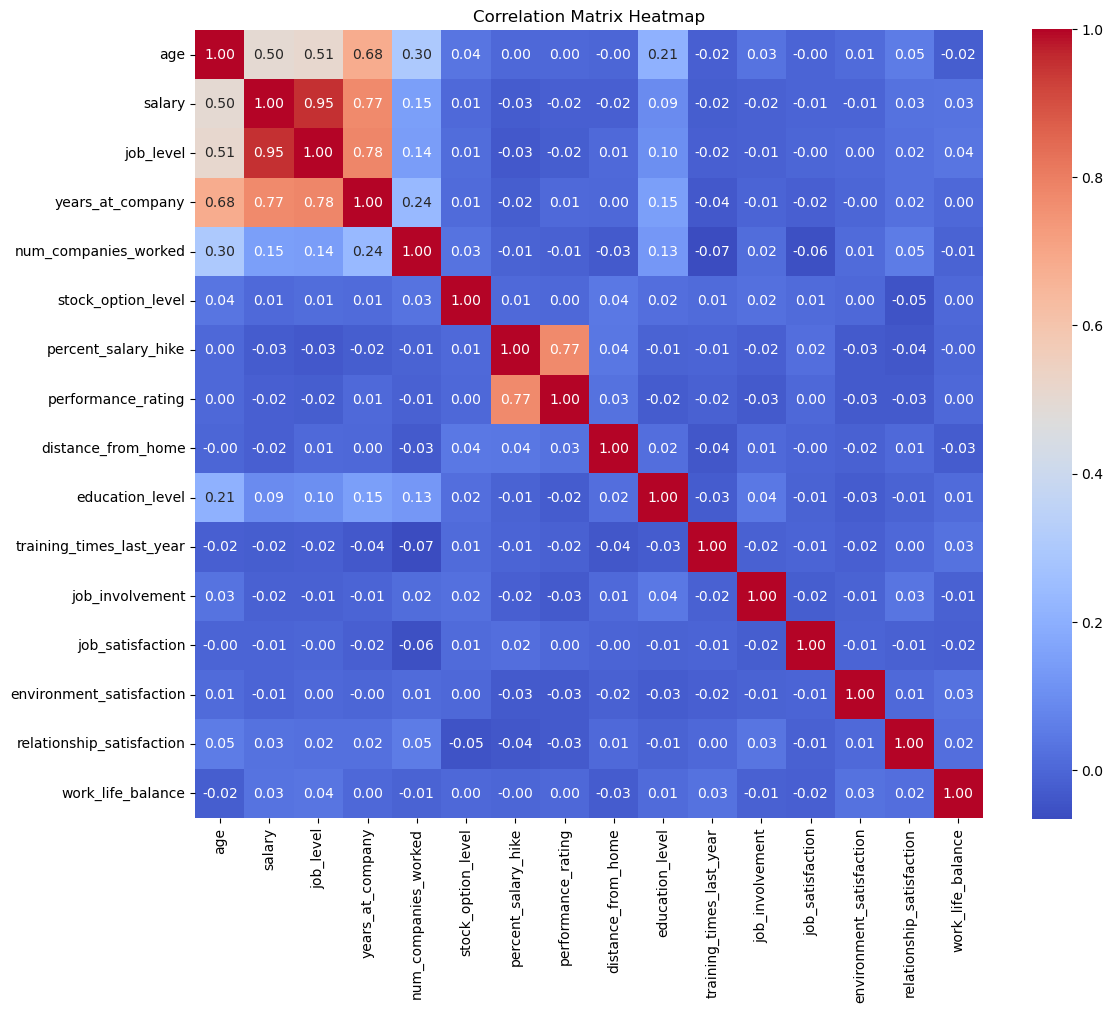

In [89]:
# 相関ヒートマップを作成
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.savefig(r"C:\Users\sk062\Downloads\correlation_heatmap.png")
plt.show()
plt.close()

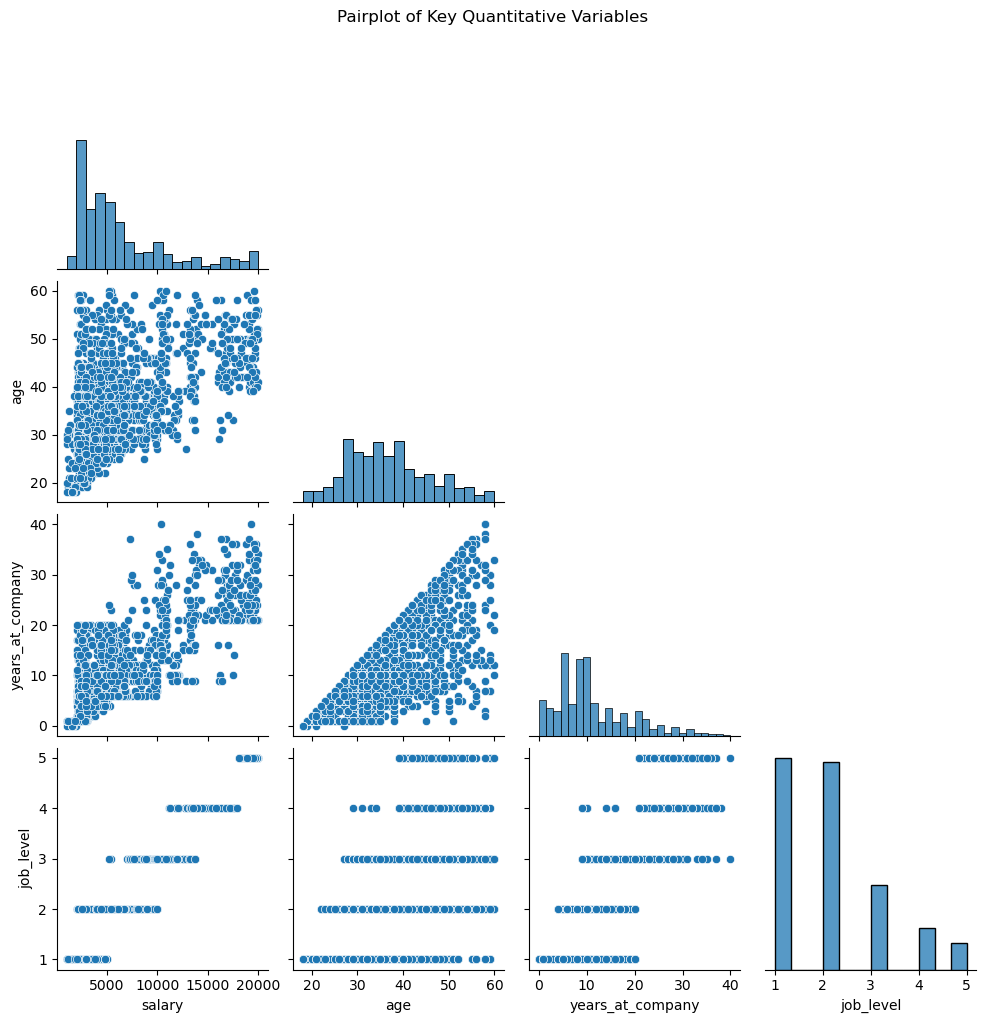

In [90]:
# ペアプロット（相関の散布図を含む）を作成
pairplot_path = r"C:\Users\sk062\Downloads\correlation_pairplot.png"
pairplot = sns.pairplot(df[['salary', 'age', 'years_at_company', 'job_level']], corner=True)
pairplot.fig.suptitle("Pairplot of Key Quantitative Variables", y=1.02)
pairplot.savefig(pairplot_path)
plt.show()
plt.close()

In [91]:
# --- 回帰分析 ---
reg_model = smf.ols('salary ~ age + C(gender) + C(department) + years_at_company', data=df).fit()
reg_model

In [92]:
# 回帰モデルAとBの再構築（念のため）
model_a = smf.ols('salary ~ age + C(gender) + C(department) + years_at_company', data=df).fit()
model_b = smf.ols('salary ~ age + C(gender) + years_at_company + job_level + performance_rating', data=df).fit()

# 回帰結果（サマリー）抽出
summary_a = model_a.summary2().tables[1]
summary_b = model_b.summary2().tables[1]

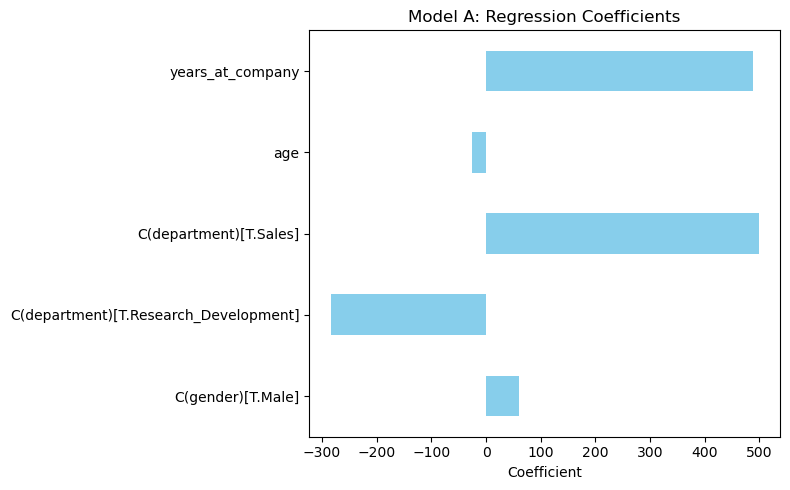

In [93]:
# 回帰係数の可視化プロット（モデルA）
plt.figure(figsize=(8, 5))
coef_a = model_a.params.drop("Intercept")
coef_a.plot(kind='barh', color='skyblue')
plt.title("Model A: Regression Coefficients")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.savefig(r"C:\Users\sk062\Downloads\regression_coef_model_a.png")
plt.show()
plt.close()

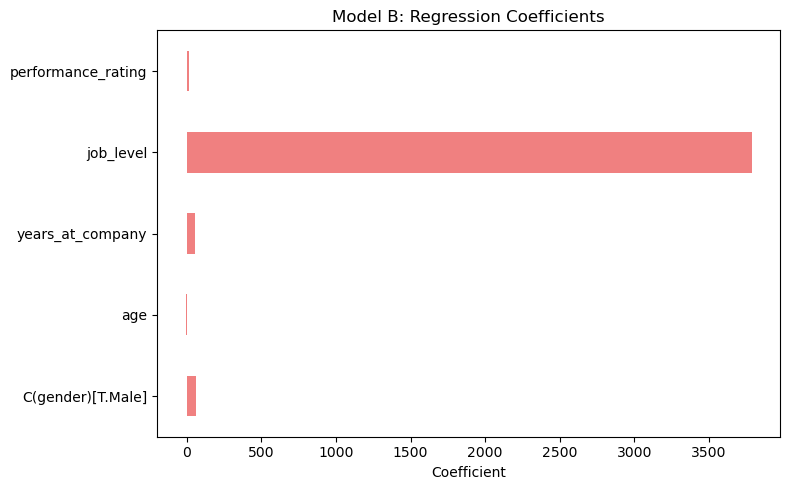

In [94]:
# 回帰係数の可視化プロット（モデルB）
plt.figure(figsize=(8, 5))
coef_b = model_b.params.drop("Intercept")
coef_b.plot(kind='barh', color='lightcoral')
plt.title("Model B: Regression Coefficients")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.savefig(r"C:\Users\sk062\Downloads\regression_coef_model_b.png")
plt.show()
plt.close()

=== モデルAの結果 ===
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     447.7
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          8.01e-292
Time:                        09:50:00   Log-Likelihood:                -13835.
No. Observations:                1470   AIC:                         2.768e+04
Df Residuals:                    1464   BIC:                         2.771e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

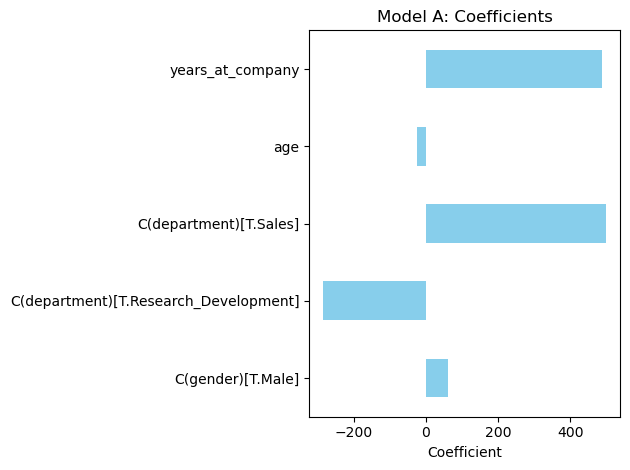

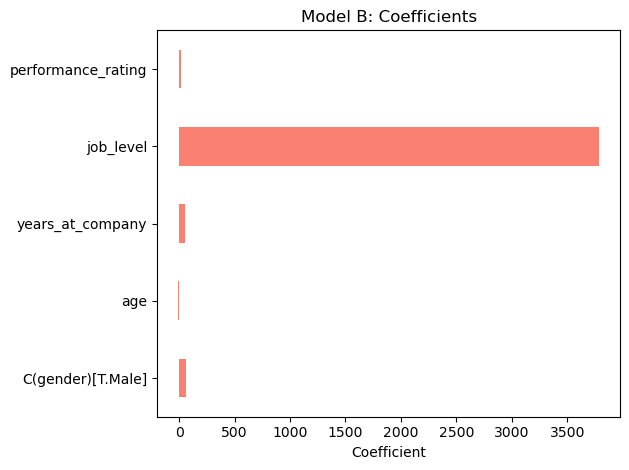

In [95]:

# --- モデルAの構築と学習 ---
model_a = smf.ols('salary ~ age + C(gender) + C(department) + years_at_company', data=df).fit()
print("=== モデルAの結果 ===")
print(model_a.summary())

# --- モデルBの構築と学習 ---
model_b = smf.ols('salary ~ age + C(gender) + years_at_company + job_level + performance_rating', data=df).fit()
print("=== モデルBの結果 ===")
print(model_b.summary())

# --- モデルA/Bの係数比較 ---
model_a.params.drop("Intercept").plot(kind="barh", color="skyblue")
plt.title("Model A: Coefficients")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()

model_b.params.drop("Intercept").plot(kind="barh", color="salmon")
plt.title("Model B: Coefficients")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()


In [96]:
# 教育レベルで一元配置分散分析（カテゴリとして扱う）
model_edu = ols('salary ~ C(education_level)', data=df).fit()
anova_edu = sm.stats.anova_lm(model_edu, typ=2)

print(anova_edu)

                          sum_sq      df         F    PR(>F)
C(education_level)  3.424515e+08     4.0  3.892977  0.003769
Residual            3.221772e+10  1465.0       NaN       NaN


In [97]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# モデル定義（性別・部署・交互作用）
model_twoway = ols('salary ~ C(gender) + C(department) + C(gender):C(department)', data=df).fit()
anova_twoway = sm.stats.anova_lm(model_twoway, typ=2)

anova_twoway

,sum_sq,df,F,PR(>F)
C(gender),2.997525e+07,1.0,1.355529,0.244504
C(department),1.384378e+08,2.0,3.130189,0.044002
C(gender):C(department),1.477584e+07,2.0,0.334094,0.716041
Residual,3.237391e+10,1464.0,NaN,NaN


In [98]:
# --- ロジスティック回帰 ---
df['attrition_binary'] = df['attrition'].map({True: 1, False: 0})
logit_model = smf.glm(
    formula='attrition_binary ~ age + C(gender) + C(department)',
    data=df,
    family=sm.families.Binomial(link=sm.families.links.logit())
).fit()

C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [99]:
df["attrition"].unique()

array([ True, False])

In [100]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


                          Results: Generalized linear model
Model:              GLM                                     AIC:            1253.3954 
Link Function:      logit                                   BIC:            -9451.4615
Dependent Variable: ['attrition[False]', 'attrition[True]'] Log-Likelihood: -623.70   
Date:               2025-07-18 09:50                        LL-Null:        -649.29   
No. Observations:   1470                                    Deviance:       1247.4    
Df Model:           2                                       Pearson chi2:   1.59e+03  
Df Residuals:       1467                                    Scale:          1.0000    
Method:             IRLS                                                              
------------------------------------------------------------------------------------------
                         Coef.      Std.Err.        z        P>|z|       [0.025     0.975]
--------------------------------------------------------------

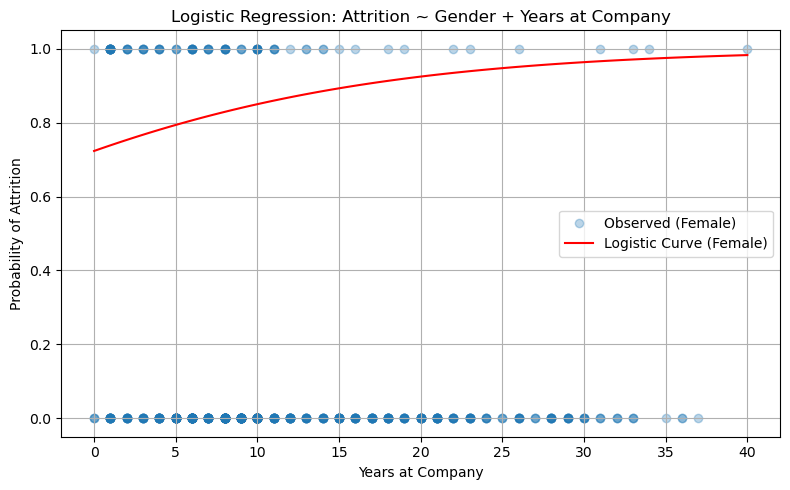

In [103]:
# 欠損値を除外（3列すべてが必要）
df_clean = df[['attrition', 'years_at_company', 'gender']].dropna()

# ロジスティック回帰モデル（link=logit）
model = glm(
    formula='attrition ~ C(gender) + years_at_company',
    data=df_clean,
    family=sm.families.Binomial(link=sm.families.links.logit())
).fit()

# 結果出力
print(model.summary2())

# ロジスティック回帰曲線の可視化（例：女性のみ）
female_data = df_clean[df_clean['gender'] == 'Female']
x_vals = np.linspace(female_data['years_at_company'].min(), female_data['years_at_company'].max(), 100)
X_pred = pd.DataFrame({'years_at_company': x_vals, 'gender': 'Female'})
y_pred = model.predict(X_pred)

plt.figure(figsize=(8, 5))
plt.scatter(female_data['years_at_company'], female_data['attrition'], alpha=0.3, label='Observed (Female)')
plt.plot(x_vals, y_pred, color='red', label='Logistic Curve (Female)')
plt.xlabel('Years at Company')
plt.ylabel('Probability of Attrition')
plt.title('Logistic Regression: Attrition ~ Gender + Years at Company')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
